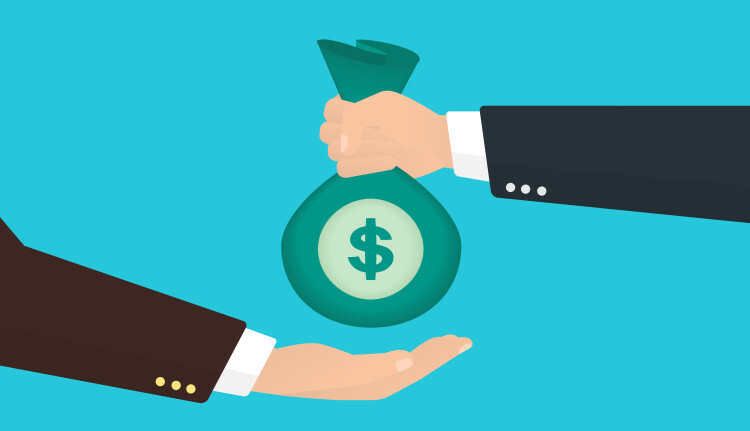

# <u><b>LOAN STATUS PREDICTION:-</u></b>


<b>The loan approval status signifies the determination made by a financial institution or lender regarding the acceptance or rejection of a loan application. The process of loan approval entails a comprehensive assessment of the applicant's financial credibility, taking into consideration factors such as their creditworthiness, income level, and other relevant financial aspects. The final decision to approve or decline a loan is influenced by several factors, including the borrower's credit score, debt-to-income ratio, employment track record, and the intended use of the loan funds.</b>

# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [2]:
#Loading "train" data set.
train = pd.read_csv("D:/Machine_Learning_Datasets/loan_data_set.csv")
train

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [3]:
# Checking the Total Number of Rows & Columns

train.shape

(614, 13)

In [4]:
#Checking all the columns present in the training dataset.

train.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [5]:
# Describing traing dataset.

train.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [6]:
#Checking data types of columns.

train.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

# DATA CLEANING OF "TRAIN" DATASET:-

In [7]:
#Checking duplicates.

train.duplicated().sum()

0

* There are no duplicate values present in "Train" Dataset

In [8]:
#Checking info of dataset.

train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [9]:
#Checking null values present in the columns of training dataset.

train.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

<AxesSubplot:>

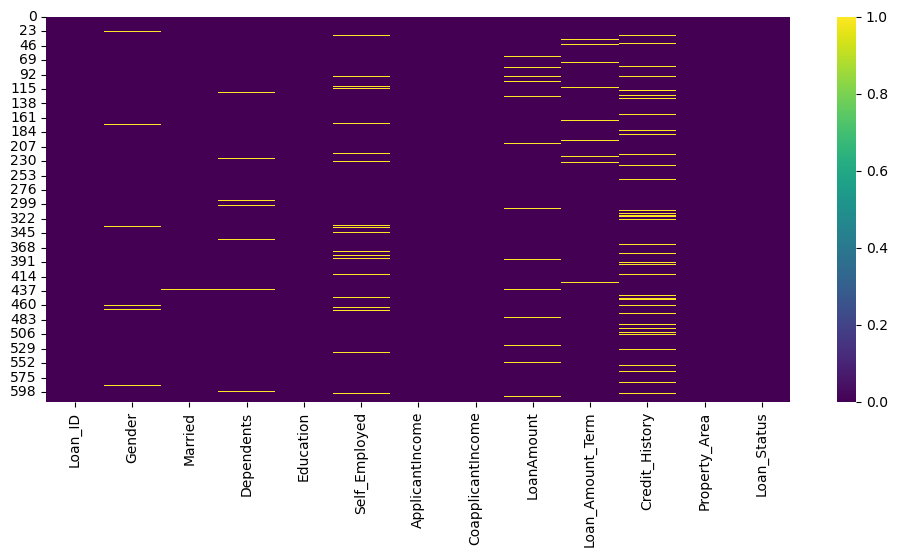

In [10]:
#Ploting Heatmap for the null values present in the columns of training dataset.

plt.figure(figsize=(12,5))
sns.heatmap(train.isnull(),cmap='viridis')

In [11]:
# As "Gender" is Object type, that is I performed imputation with mode.

train['Gender'].mode()[0]

'Male'

In [12]:
# Filling null values of "Gender" column with mode.

train['Gender'] = train['Gender'].fillna(train['Gender'].mode()[0])

In [13]:
# As "Married" is Object type, that is why I performed imputation with mode.

train['Married'].mode()[0]

'Yes'

In [14]:
#Filling null values of "Married" column with mode.

train['Married'] = train['Married'].fillna(train['Married'].mode()[0])

In [15]:
#As "Dependents" is Object type, that is why I performed imputation with mode.

train['Dependents'].mode()[0]

'0'

In [16]:
#Filling null values of "Dependents" column with mode.

train['Dependents'] = train['Dependents'].fillna(train['Dependents'].mode()[0])

In [17]:
#As "Self_Employed" is Object type, that is why I performed imputation with mode.

train['Self_Employed'].mode()[0]

'No'

In [18]:
#Filling null values of "Self_Employed" column with Mode.

train['Self_Employed'] = train['Self_Employed'].fillna(train['Self_Employed'].mode()[0])

In [19]:
#As "LoanAmount" is int type, that is why I checked that the data, is standard normally ditrubuted or not
                                                                            
train['LoanAmount'].describe()

count    592.000000
mean     146.412162
std       85.587325
min        9.000000
25%      100.000000
50%      128.000000
75%      168.000000
max      700.000000
Name: LoanAmount, dtype: float64

<AxesSubplot:ylabel='Density'>

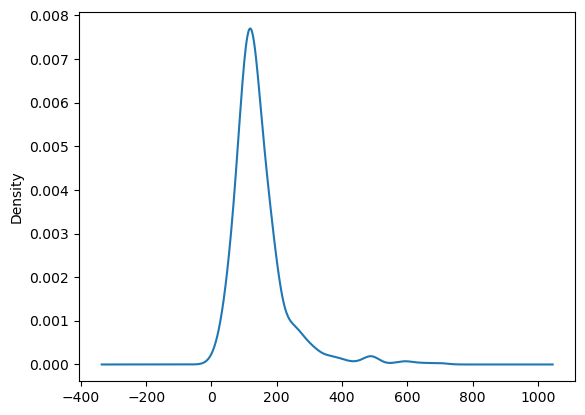

In [20]:
# Ploting kde to show LoanAmount is not standard normally distributed.

train['LoanAmount'].plot(kind="kde")

* Here we got to know that the column "LoanAmount" is not standard normally distributed and mean is greater than median thats why we are going to perform imputation with the Median of "LoanAmount".

In [21]:
#As "LoanAmount" is of Int type and not standard normally distributed that is why we are performing imputation with Median.

train['LoanAmount'].median()

128.0

In [22]:
#Filling null values of "LoanAmount" column with Median.

train['LoanAmount'] = train['LoanAmount'].fillna(train['LoanAmount'].median())

In [23]:
#As "Loan_Amount_Term" is int type, that is why I checked that the data, Is standard normally ditrubuted or not 

train['Loan_Amount_Term'].describe()

count    600.00000
mean     342.00000
std       65.12041
min       12.00000
25%      360.00000
50%      360.00000
75%      360.00000
max      480.00000
Name: Loan_Amount_Term, dtype: float64

<AxesSubplot:ylabel='Density'>

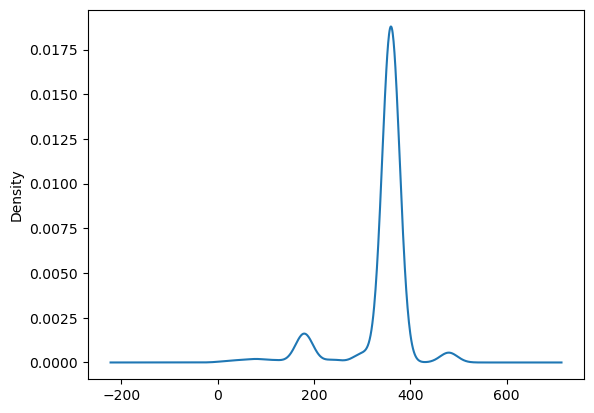

In [24]:
# Ploting kde to show LoanAmount is not standard normally distributed.

train['Loan_Amount_Term'].plot(kind="kde")

* Here we got to know that the column "Loan_Amount_Term" is not standard normally distributed and mean is less than median thats why we are going to perform imputation with the Median of "Loan_Amount_Term".

In [25]:
#As "Loan_Amount_Term" is of Int type and not standard normally distributed that is why we are performing 
#                                                                                               imputation with Median.

train['Loan_Amount_Term'].median()

360.0

In [26]:
#Filling null values of "Loan_Amount_Term" column with Median.

train['Loan_Amount_Term'] = train['Loan_Amount_Term'].fillna(train['Loan_Amount_Term'].median())

In [27]:
#As "Credit_History" is int type, that is why I checked that the data, Is standard normally ditrubuted or not

train['Credit_History'].describe()

count    564.000000
mean       0.842199
std        0.364878
min        0.000000
25%        1.000000
50%        1.000000
75%        1.000000
max        1.000000
Name: Credit_History, dtype: float64

<AxesSubplot:ylabel='Density'>

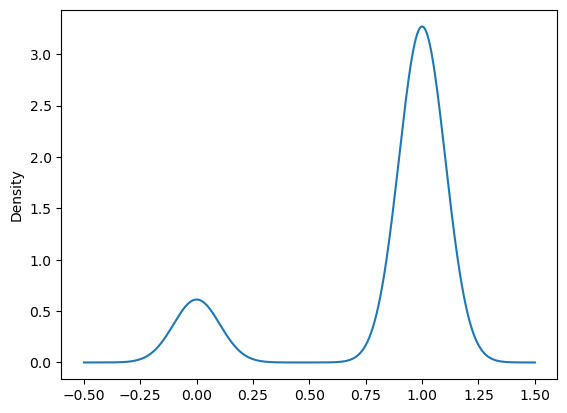

In [28]:
# Ploting kde to show LoanAmount is not standard normally distributed.

train['Credit_History'].plot(kind="kde")

* Here we got to know that the column "Credit_History" is almost standard normally distributed and mean is equal to median thats why we are going to perform imputation with the Mean of "Credit_History".

In [29]:
#As "Credit_History" is of Int type and standard normally distributed that is why we are performing imputation with Mean.

train['Credit_History'].mean()

0.8421985815602837

In [30]:
# Filling null values of "Credit_History" column with Mean.

train['Credit_History'] = train['Credit_History'].fillna(train['Credit_History'].mean())

In [31]:
#Checking again all the null values in the training dataset.

train.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

* We can see that there are no any null values present in the "train" dataset

<AxesSubplot:>

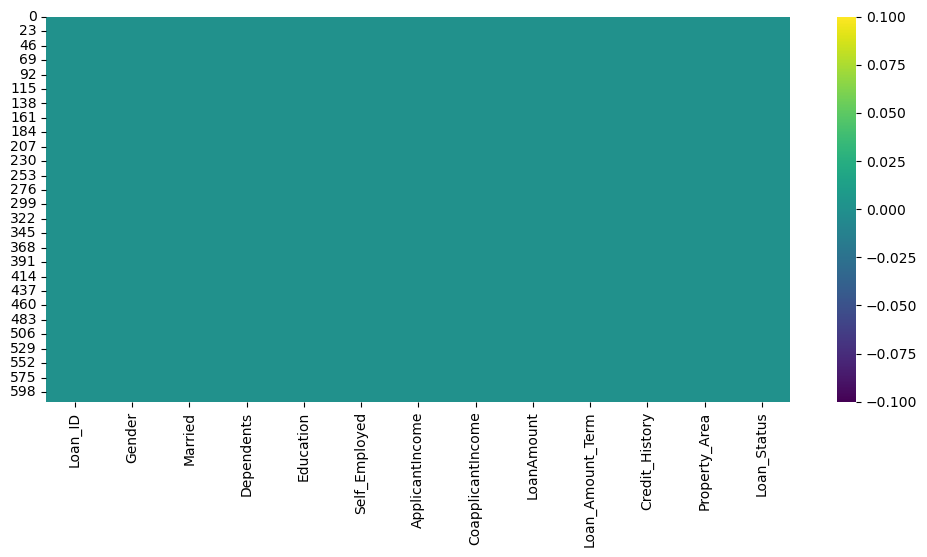

In [32]:
#Ploting Heatmap for showing the no null values are present in the columns of training dataset.

plt.figure(figsize=(12,5))
sns.heatmap(train.isnull(),cmap='viridis')

In [33]:
#Droping "Loan_ID" column from "Train" dataset as it is not required.

train = train.drop('Loan_ID',axis=1)

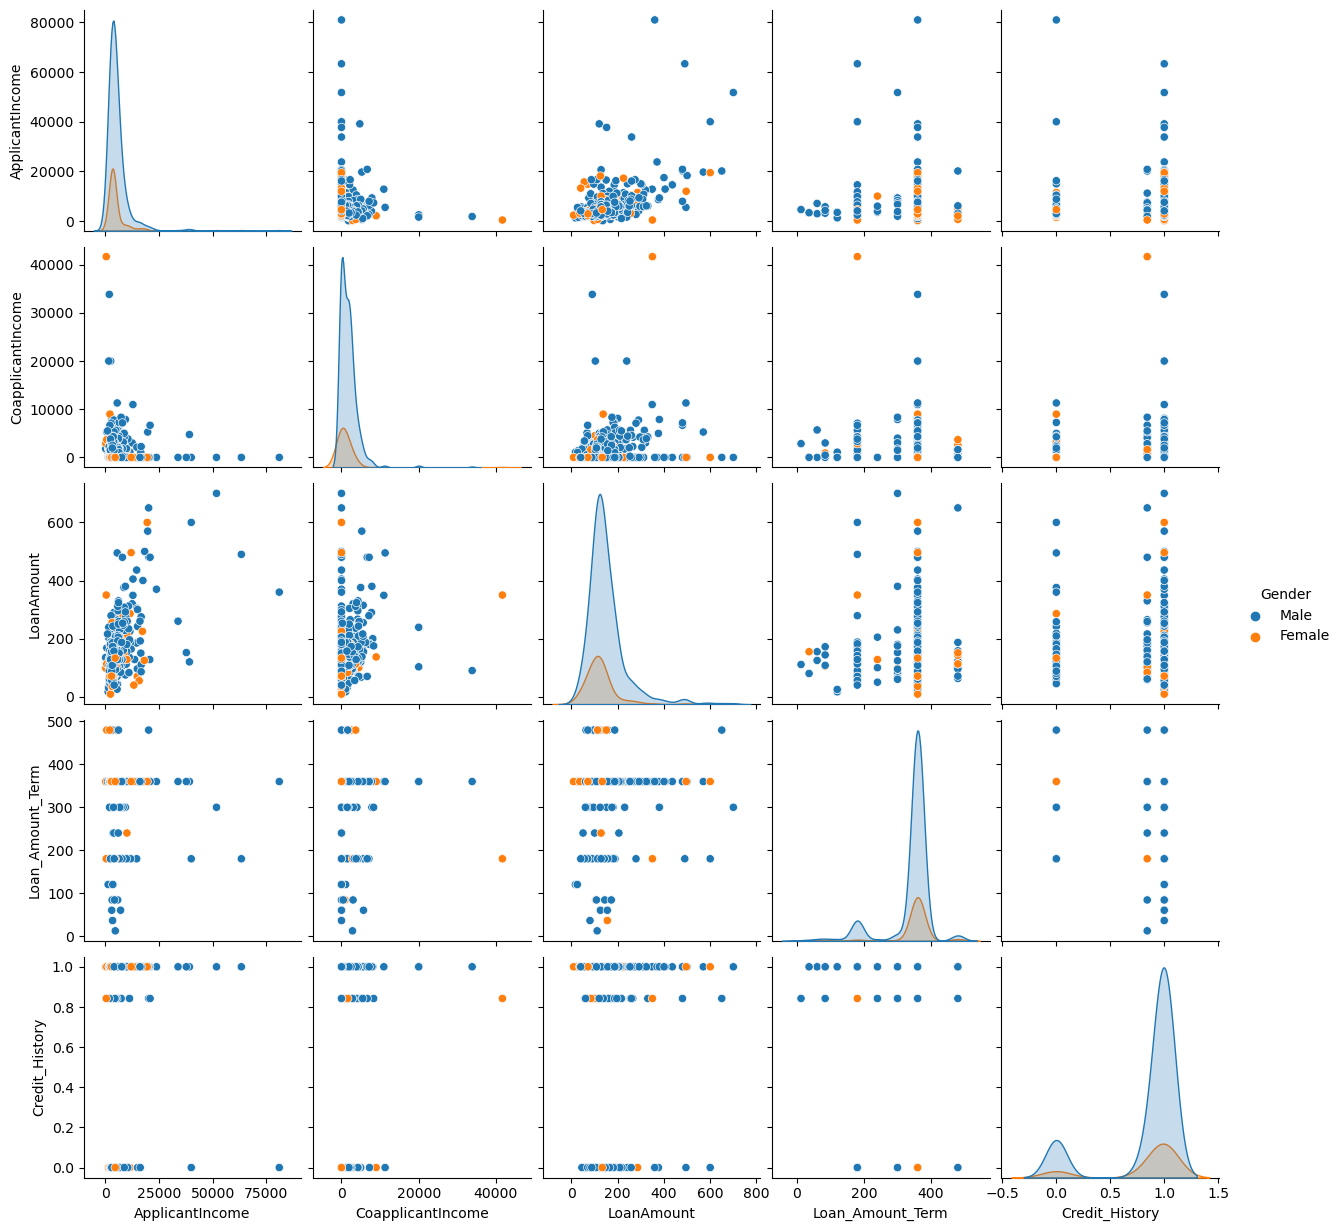

In [34]:
# Ploting pairplot for all the numeric columns.

sns.pairplot(data = train,hue='Gender')

# ANALYSING  "<u>TEST</u>"  DATASET:-

In [35]:
test = pd.read_csv("D:/Machine_Learning_Datasets/test (1).csv")
test

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban
...,...,...,...,...,...,...,...,...,...,...,...,...
362,LP002971,Male,Yes,3+,Not Graduate,Yes,4009,1777,113.0,360.0,1.0,Urban
363,LP002975,Male,Yes,0,Graduate,No,4158,709,115.0,360.0,1.0,Urban
364,LP002980,Male,No,0,Graduate,No,3250,1993,126.0,360.0,NaN,Semiurban
365,LP002986,Male,Yes,0,Graduate,No,5000,2393,158.0,360.0,1.0,Rural


In [36]:
#Checking top Rows.

test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [37]:
#Checking total number of rows and columns in "Test" dataset.

test.shape

(367, 12)

In [38]:
# Checking all the columns present in the "test" dataset.

test.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
      dtype='object')

In [39]:
# Checking Data types of columns.

test.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome      int64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
dtype: object

In [40]:
#Describing "Test" dataset.

test.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,367.000000,367.000000,362.000000,361.000000,338.000000
mean,4805.599455,1569.577657,136.132597,342.537396,0.825444
std,4910.685399,2334.232099,61.366652,65.156643,0.380150
min,0.000000,0.000000,28.000000,6.000000,0.000000
25%,2864.000000,0.000000,100.250000,360.000000,1.000000
50%,3786.000000,1025.000000,125.000000,360.000000,1.000000
75%,5060.000000,2430.500000,158.000000,360.000000,1.000000
max,72529.000000,24000.000000,550.000000,480.000000,1.000000


In [41]:
#Checking info of dataset.

test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            367 non-null    object 
 1   Gender             356 non-null    object 
 2   Married            367 non-null    object 
 3   Dependents         357 non-null    object 
 4   Education          367 non-null    object 
 5   Self_Employed      344 non-null    object 
 6   ApplicantIncome    367 non-null    int64  
 7   CoapplicantIncome  367 non-null    int64  
 8   LoanAmount         362 non-null    float64
 9   Loan_Amount_Term   361 non-null    float64
 10  Credit_History     338 non-null    float64
 11  Property_Area      367 non-null    object 
dtypes: float64(3), int64(2), object(7)
memory usage: 34.5+ KB


In [42]:
#Checking null values present in the columns of "train" dataset.

test.isnull().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

<AxesSubplot:>

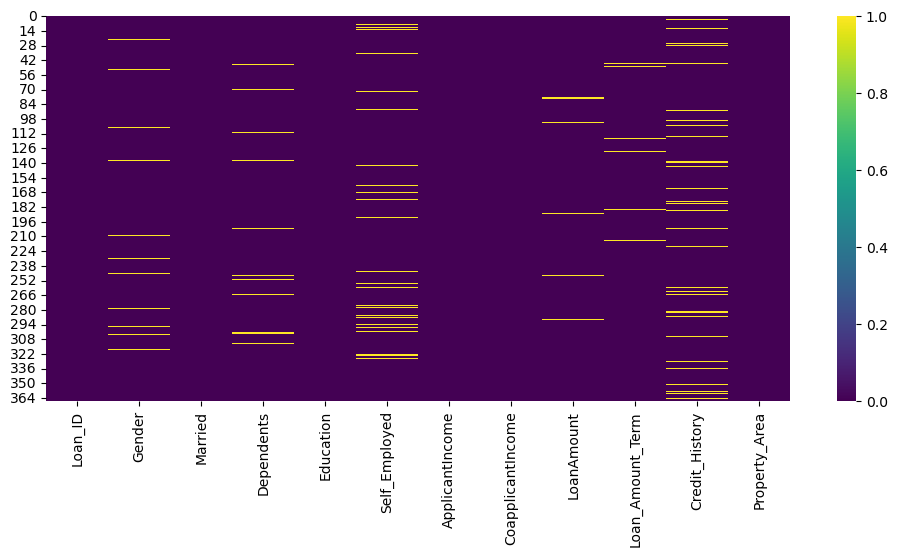

In [43]:
# Ploting Heatmap for showing the null values are present in the columns of "Train" dataset.

plt.figure(figsize=(12,5))
sns.heatmap(test.isnull(),cmap='viridis')

# DATA CLEANING ON TEST DATASET:-

In [44]:
#Checking Duplicates.

test.duplicated().sum()

0

* Hence, there is no duplicates in test dataset.

In [45]:
#As "Gender" is Object type, that is why I performed imputation with mode.

test['Gender'].mode()[0]

'Male'

In [46]:
#Filling null values of "Gender" column with Mode.

test['Gender'] = test['Gender'].fillna(test['Gender'].mode()[0])

In [47]:
#As "Dependents" is Object type, that is why I performed imputation with mode.

test['Dependents'].mode()[0]

'0'

In [48]:
#Filling null values of "Dependents" column with Mode.

test['Dependents'] = test['Dependents'].fillna(test['Dependents'].mode()[0])

In [49]:
#As "Self_Employed" is Object type, that is I performed imputation with mode.

test['Self_Employed'].mode()[0]

'No'

In [50]:
#Filling null values of "Self_Employed" column with Mode.

test['Self_Employed'] = test['Self_Employed'].fillna(test['Self_Employed'].mode()[0])

In [51]:
#As "LoanAmount" is int type, that is why we are checking that the data, Is standard normally ditrubuted or not

test['LoanAmount'].describe()

count    362.000000
mean     136.132597
std       61.366652
min       28.000000
25%      100.250000
50%      125.000000
75%      158.000000
max      550.000000
Name: LoanAmount, dtype: float64

<AxesSubplot:ylabel='Density'>

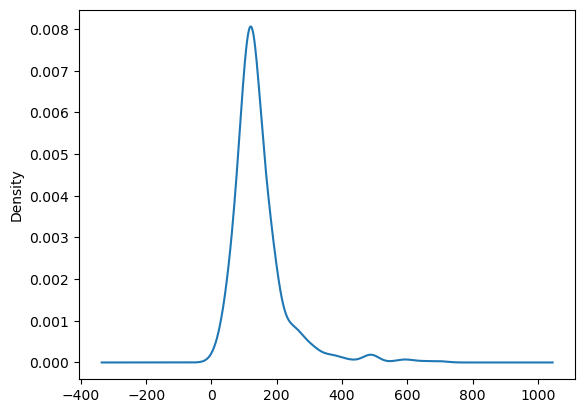

In [52]:
# Ploting kde to show LoanAmount is not standard normally distributed.

train['LoanAmount'].plot(kind="kde")

* Here we got to know that the column "LoanAmount" is not standard normally distributed and mean is greater than median thats why we are going to perform imputation with the Median of "LoanAmount".

In [53]:
#As "LoanAmount" is Int type and not standard normally distributed that is why I performed imputation with Median.

test['LoanAmount'].median()

125.0

In [54]:
#Filling null values of "LoanAmount" column with Median.

test['LoanAmount'] = test['LoanAmount'].fillna(test['LoanAmount'].median())

In [55]:
#As "Loan_Amount_Term" is int type, that is why I checked that the data, Is standard normally ditrubuted or not

test['Loan_Amount_Term'].describe()

count    361.000000
mean     342.537396
std       65.156643
min        6.000000
25%      360.000000
50%      360.000000
75%      360.000000
max      480.000000
Name: Loan_Amount_Term, dtype: float64

<AxesSubplot:ylabel='Density'>

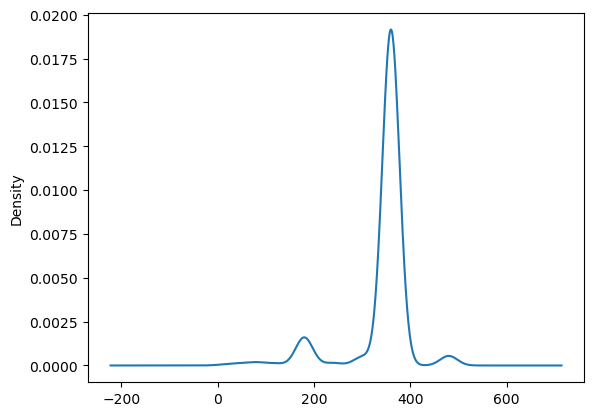

In [56]:
# Ploting kde to show LoanAmount is not standard normally distributed.

train['Loan_Amount_Term'].plot(kind="kde")

* Here we got to know that the column "Loan_Amount_Term" is not standard normally distributed and mean is less than median thats why we are going to perform imputation with the Median of "Loan_Amount_Term".

In [57]:
#As "Loan_Amount_Term" is of Int type and not standard normally distributed that is why I performed imputation with Median.

test['Loan_Amount_Term'].median()

360.0

In [58]:
#Filling null values of "Loan_Amount_Term" column with Median.

test['Loan_Amount_Term'] = test['Loan_Amount_Term'].fillna(test['Loan_Amount_Term'].median())

In [59]:
#As "Credit_History" is int type, that is I checked that the data, Is standard normally ditrubuted or not

test['Credit_History'].describe()

count    338.000000
mean       0.825444
std        0.380150
min        0.000000
25%        1.000000
50%        1.000000
75%        1.000000
max        1.000000
Name: Credit_History, dtype: float64

In [60]:
#As "Credit_History" is of Int type and standard normally distributed that is why I performed imputation with Mean.

test['Credit_History'].mean()

0.8254437869822485

In [61]:
#Filling null values of "Loan_Amount_Term" column with Mean.

test['Credit_History'] = test['Credit_History'].fillna(test['Credit_History'].mean())

In [62]:
#Checking again all the null values in the test dataset.

test.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

* Hence, there are no null values in the test dataset.

<AxesSubplot:>

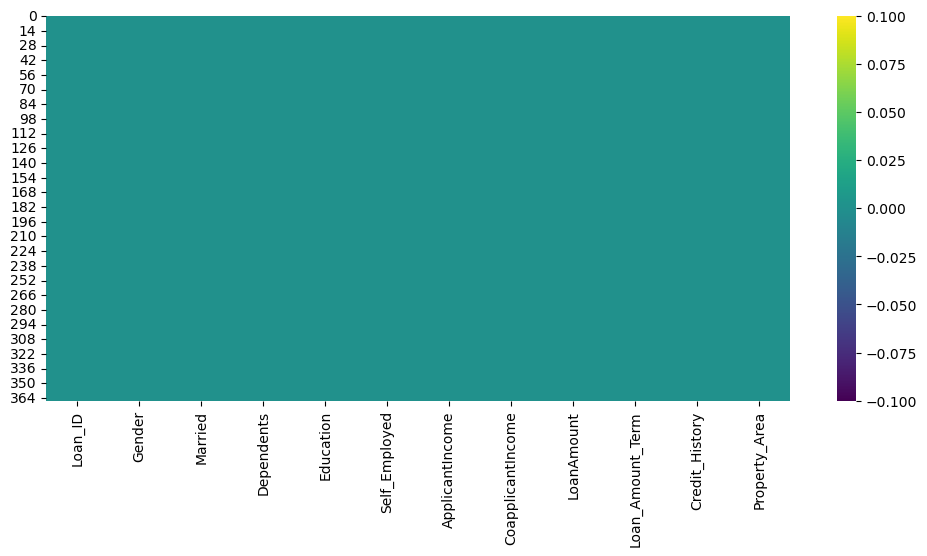

In [63]:
# Ploting Heatmap for showing the no null values are present in the columns of "Test" dataset.

plt.figure(figsize=(12,5))
sns.heatmap(test.isnull(),cmap='viridis')

In [64]:
#Droping "Loan_ID" column from "test" dataset as it is not required.

test = test.drop('Loan_ID',axis=1)

In [65]:
#Determining X(input columns) and Y(Target column) from training dataset.

x = train.drop('Loan_Status',axis=1)
y = train.Loan_Status

In [66]:
#Performing ONE HOT ENCODING For changing Categorical columns to numeric so that it can be fitted to the model.

x = pd.get_dummies(x)
train = pd.get_dummies(train)
test = pd.get_dummies(test)

In [67]:
#Splitting "Train" dataset into x_train,x_test,y_train,y_test with the ratio 70:30.

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=(1))

In [68]:
#Applying Logistic Regression model to the "Train" dataset(fitted x_train,y_train) and predicting through the model by 
#                                                                                                            testing x_test.

model = LogisticRegression()
model.fit(x_train,y_train)
pred = model.predict(x_test)

C:\Users\panka\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


* We got the prediction from the model, to find the accuracy score we'll compare y_test(actual), pred(predicted).

In [69]:
#Checking accuracy score of the model.

accuracy_score(y_test,pred)

0.7891891891891892

* Accuracy of the model is almost 80%.

In [70]:
# Checking error rate and no. of correct prediction using "Confusion Matrix".

confusion_matrix(y_test,pred)

array([[ 25,  36],
       [  3, 121]], dtype=int64)

* As we can see, 146 are correct no. of prediction and 39 wrong no. of prediction.

In [71]:
# Creating Target Column in the "Test" dataset, by predicting through model.

test['Target'] = model.predict(test)

In [72]:
test.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Female,Gender_Male,Married_No,Married_Yes,Dependents_0,...,Dependents_2,Dependents_3+,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,Target
0,5720,0,110.0,360.0,1.000000,0,1,0,1,1,...,0,0,1,0,1,0,0,0,1,Y
1,3076,1500,126.0,360.0,1.000000,0,1,0,1,0,...,0,0,1,0,1,0,0,0,1,Y
2,5000,1800,208.0,360.0,1.000000,0,1,0,1,0,...,1,0,1,0,1,0,0,0,1,Y
3,2340,2546,100.0,360.0,0.825444,0,1,0,1,0,...,1,0,1,0,1,0,0,0,1,Y
4,3276,0,78.0,360.0,1.000000,0,1,1,0,1,...,0,0,0,1,1,0,0,0,1,Y


In [73]:
# Determining Precision,recall,f1-score with Classification Report.

report = classification_report(y_test,pred)
report

'              precision    recall  f1-score   support\n\n           N       0.89      0.41      0.56        61\n           Y       0.77      0.98      0.86       124\n\n    accuracy                           0.79       185\n   macro avg       0.83      0.69      0.71       185\nweighted avg       0.81      0.79      0.76       185\n'

# <font color=darkred><u> **RESULT AND CONCLUSION:-** </u> </font>

* <b>RESULT--</b> The loan status prediction project using logistic regression has been successfully completed. The model was trained using a dataset of historical loan applications, and it was able to accurately predict the loan status of new applications with a high level of precision. After performing logistic regression analysis on the loan data, we were able to predict the loan status with an accuracy of <b>0.789%</b> almost <b>80%</b>. The model showed that the most significant factors affecting loan approval were Income, Credit history, and Employment.

* <b>CONCLUSION--</b> Based on the results, we can conclude that logistic regression is an effective method for predicting loan status. The model was able to identify important factors that influence loan approval, such as credit score, income, and employment status. This information can be used by lenders to make informed decisions about loan applications, ultimately reducing the risk of default and improving the overall efficiency of the lending process. Our results demonstrate the importance of considering multiple factors when evaluating loan applications and suggest potential ways to improve the loan approval process.